In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mplsoccer import Pitch

In [2]:
# Set up the football pitch
pitch_length = 100
pitch_width = 100

In [3]:
# Player IDs for the German team
ger_player_ids = {
    'Ann Katrin Berger': 168415,
    'Sarai Linder': 883583,
    'Marina Hegering': 68252,
    'Kathrin Hendrich': 117572,
    'Giulia Gwinn': 883568,
    'Klara Bühl': 945626,
    'Janina Minge': 883566,
    'Alexandra Popp': 68256,
    'Jule Brand': 1064651,
    'Lea Schüller': 860816,
    'Sjoeke Nüsken': 1009005,
    'Sydney Lohmann': 964032,
    'Bibiane Schulze Solano': 1084042,
    'Elisa Senß': 1008950,
    'Vivien Endemann': 1137395
}

# Player IDs for the Australian team
aus_player_ids = {
    'Mackenzie Arnold': 795999,
    'Ellie Carpenter': 845417,
    'Alanna Kennedy': 796003,
    'Clare Hunt': 1096382,
    'Stephanie Catley': 796005,
    'Hayley Raso': 796001,
    'Katrina Gorry': 796007,
    'Kyra Cooney-Cross': 985845,
    'Caitlin Foord': 154932,
    'Mary Fowler': 958671,
    'Cortnee Vine': 1006218,
    'Clare Wheeler': 1014062,
    'Sharn Freier': 1096349,
    'Kaitlyn Torpey': 1016683,
    'Emily Van Egmond': 154930,
    'Michelle Heyman': 226096
}

In [4]:
# Function to fetch heatmap data
def fetch_heatmap_data(player_id):
    url = f'https://www.sofascore.com/api/v1/event/12178908/player/{player_id}/heatmap'
    response = requests.get(url)
    data = response.json()
    if 'heatmap' in data and isinstance(data['heatmap'], list):
        x_coords = [point['x'] for point in data['heatmap']]
        y_coords = [point['y'] for point in data['heatmap']]
        return x_coords, y_coords
    else:
        return [], []

In [5]:
# Function to plot a player's heatmap
def plot_heatmap(ax, x_coords, y_coords, title):
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black")
    ax.plot([0, 6, 6, 0], [30, 30, 70, 70], color="black")
    ax.plot([100, 94, 94, 100], [30, 30, 70, 70], color="black")
    ax.plot([0, 18, 18, 0], [18, 18, 82, 82], color="black")
    ax.plot([100, 82, 82, 100], [18, 18, 82, 82], color="black")
    ax.plot([50, 50], [0, 100], color="black")
    ax.plot([50], [50], marker='o', color='black')
    circle = plt.Circle((50, 50), 9.15, color="black", fill=False)
    ax.add_patch(circle)
    sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
    ax.set_xlim(0, pitch_length)
    ax.set_ylim(0, pitch_width)
    ax.set_title(title)
    ax.set_aspect('equal', adjustable='box')

C:\Users\theod\AppData\Local\Temp\ipykernel_8264\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_8264\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_8264\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_8264\3158559870.py:12: FutureWarning: 

`sha

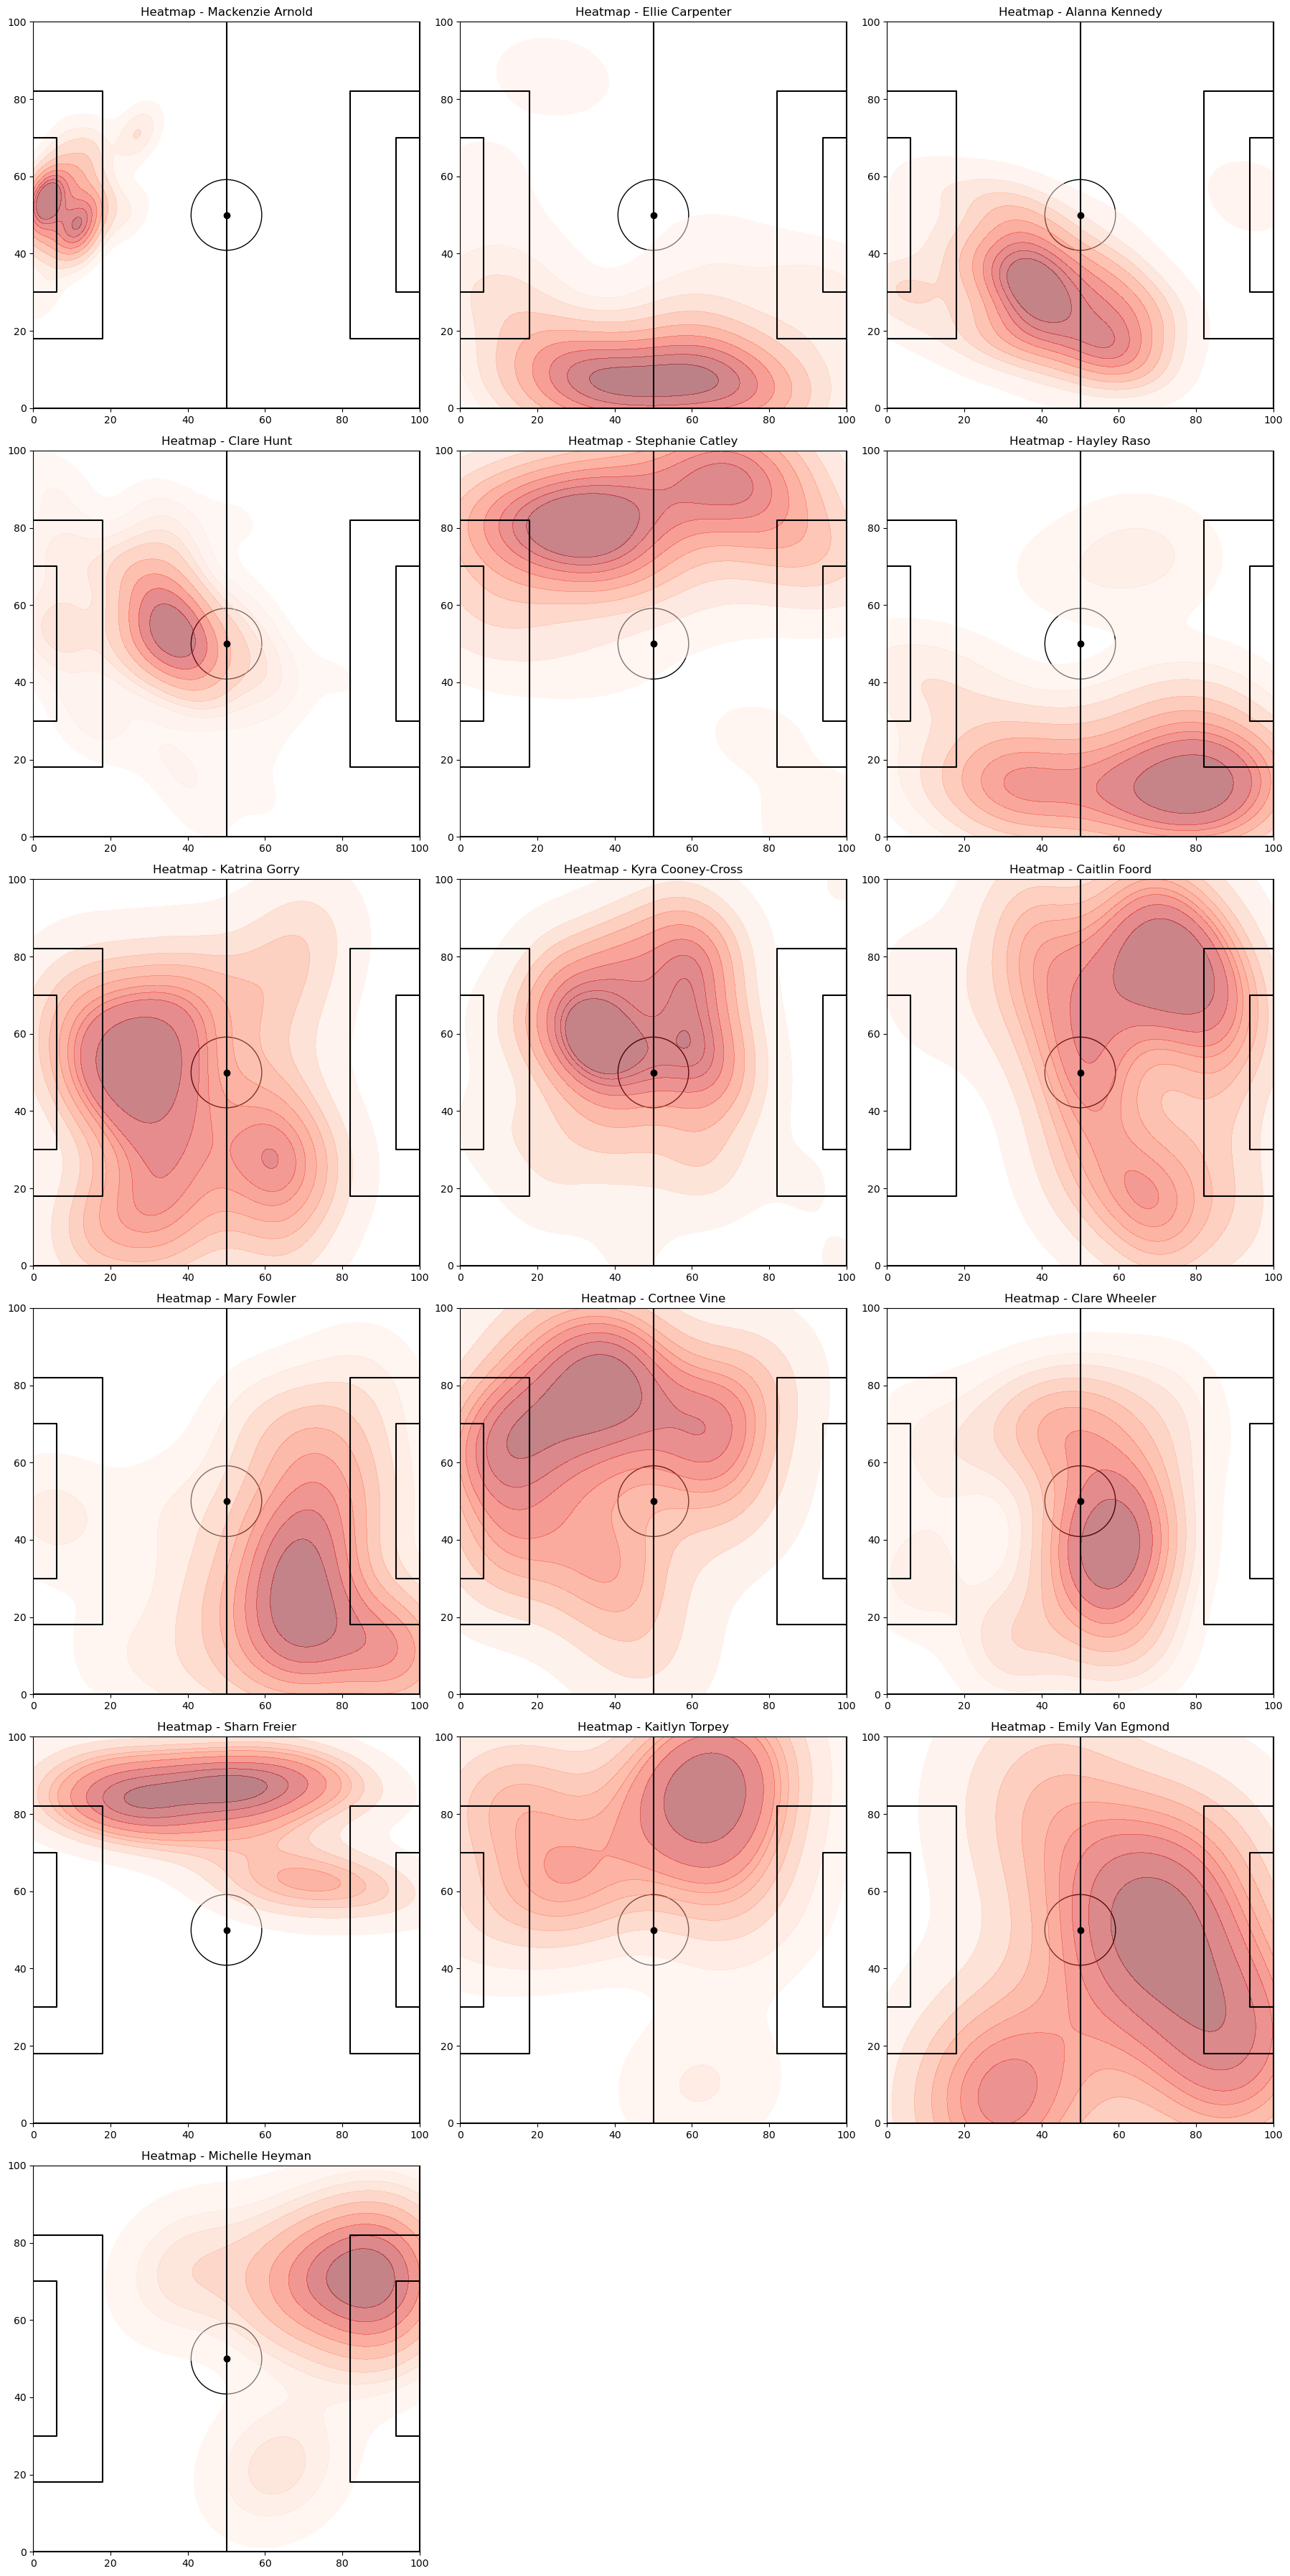

In [6]:
# Create subplots for individual heatmaps
fig, axes = plt.subplots(6, 3, figsize=(18, 36))

# Collect all coordinates for combined heatmap
all_x_coords = []
all_y_coords = []

# Plot each player's heatmap
for ax, (player_name, player_id) in zip(axes.flat, aus_player_ids.items()):
    x_coords, y_coords = fetch_heatmap_data(player_id)
    plot_heatmap(ax, x_coords, y_coords, f"Heatmap - {player_name}")
    all_x_coords.extend(x_coords)
    all_y_coords.extend(y_coords)

# Remove any extra subplots (if any)
for i in range(len(aus_player_ids), len(axes.flat)):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

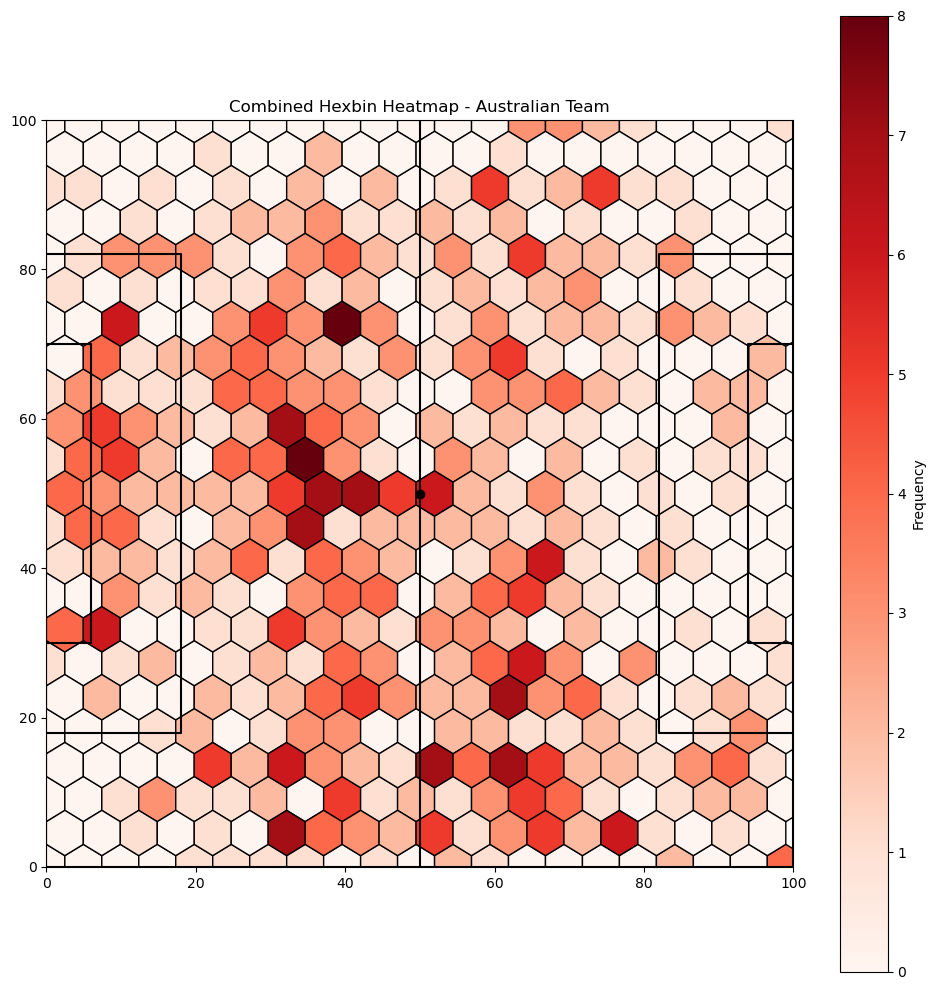

In [7]:
# Create a combined heatmap with hexbin
fig, ax = plt.subplots(figsize=(10, 10))

# Function to plot a combined heatmap with hexbin
def plot_combined_hexbin(ax, x_coords, y_coords):
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black")
    ax.plot([0, 6, 6, 0], [30, 30, 70, 70], color="black")
    ax.plot([100, 94, 94, 100], [30, 30, 70, 70], color="black")
    ax.plot([0, 18, 18, 0], [18, 18, 82, 82], color="black")
    ax.plot([100, 82, 82, 100], [18, 18, 82, 82], color="black")
    ax.plot([50, 50], [0, 100], color="black")
    ax.plot([50], [50], marker='o', color='black')
    circle = plt.Circle((50, 50), 9.15, color="black", fill=False)
    ax.add_patch(circle)
    hb = ax.hexbin(x_coords, y_coords, gridsize=20, cmap='Reds', edgecolors='black')
    cb = plt.colorbar(hb, ax=ax)
    cb.set_label('Frequency')
    ax.set_xlim(0, pitch_length)
    ax.set_ylim(0, pitch_width)
    ax.set_title("Combined Hexbin Heatmap - Australian Team")
    ax.set_aspect('equal', adjustable='box')

plot_combined_hexbin(ax, all_x_coords, all_y_coords)

plt.tight_layout()
plt.show()

C:\Users\theod\AppData\Local\Temp\ipykernel_8264\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_8264\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_8264\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_8264\3158559870.py:12: FutureWarning: 

`sha

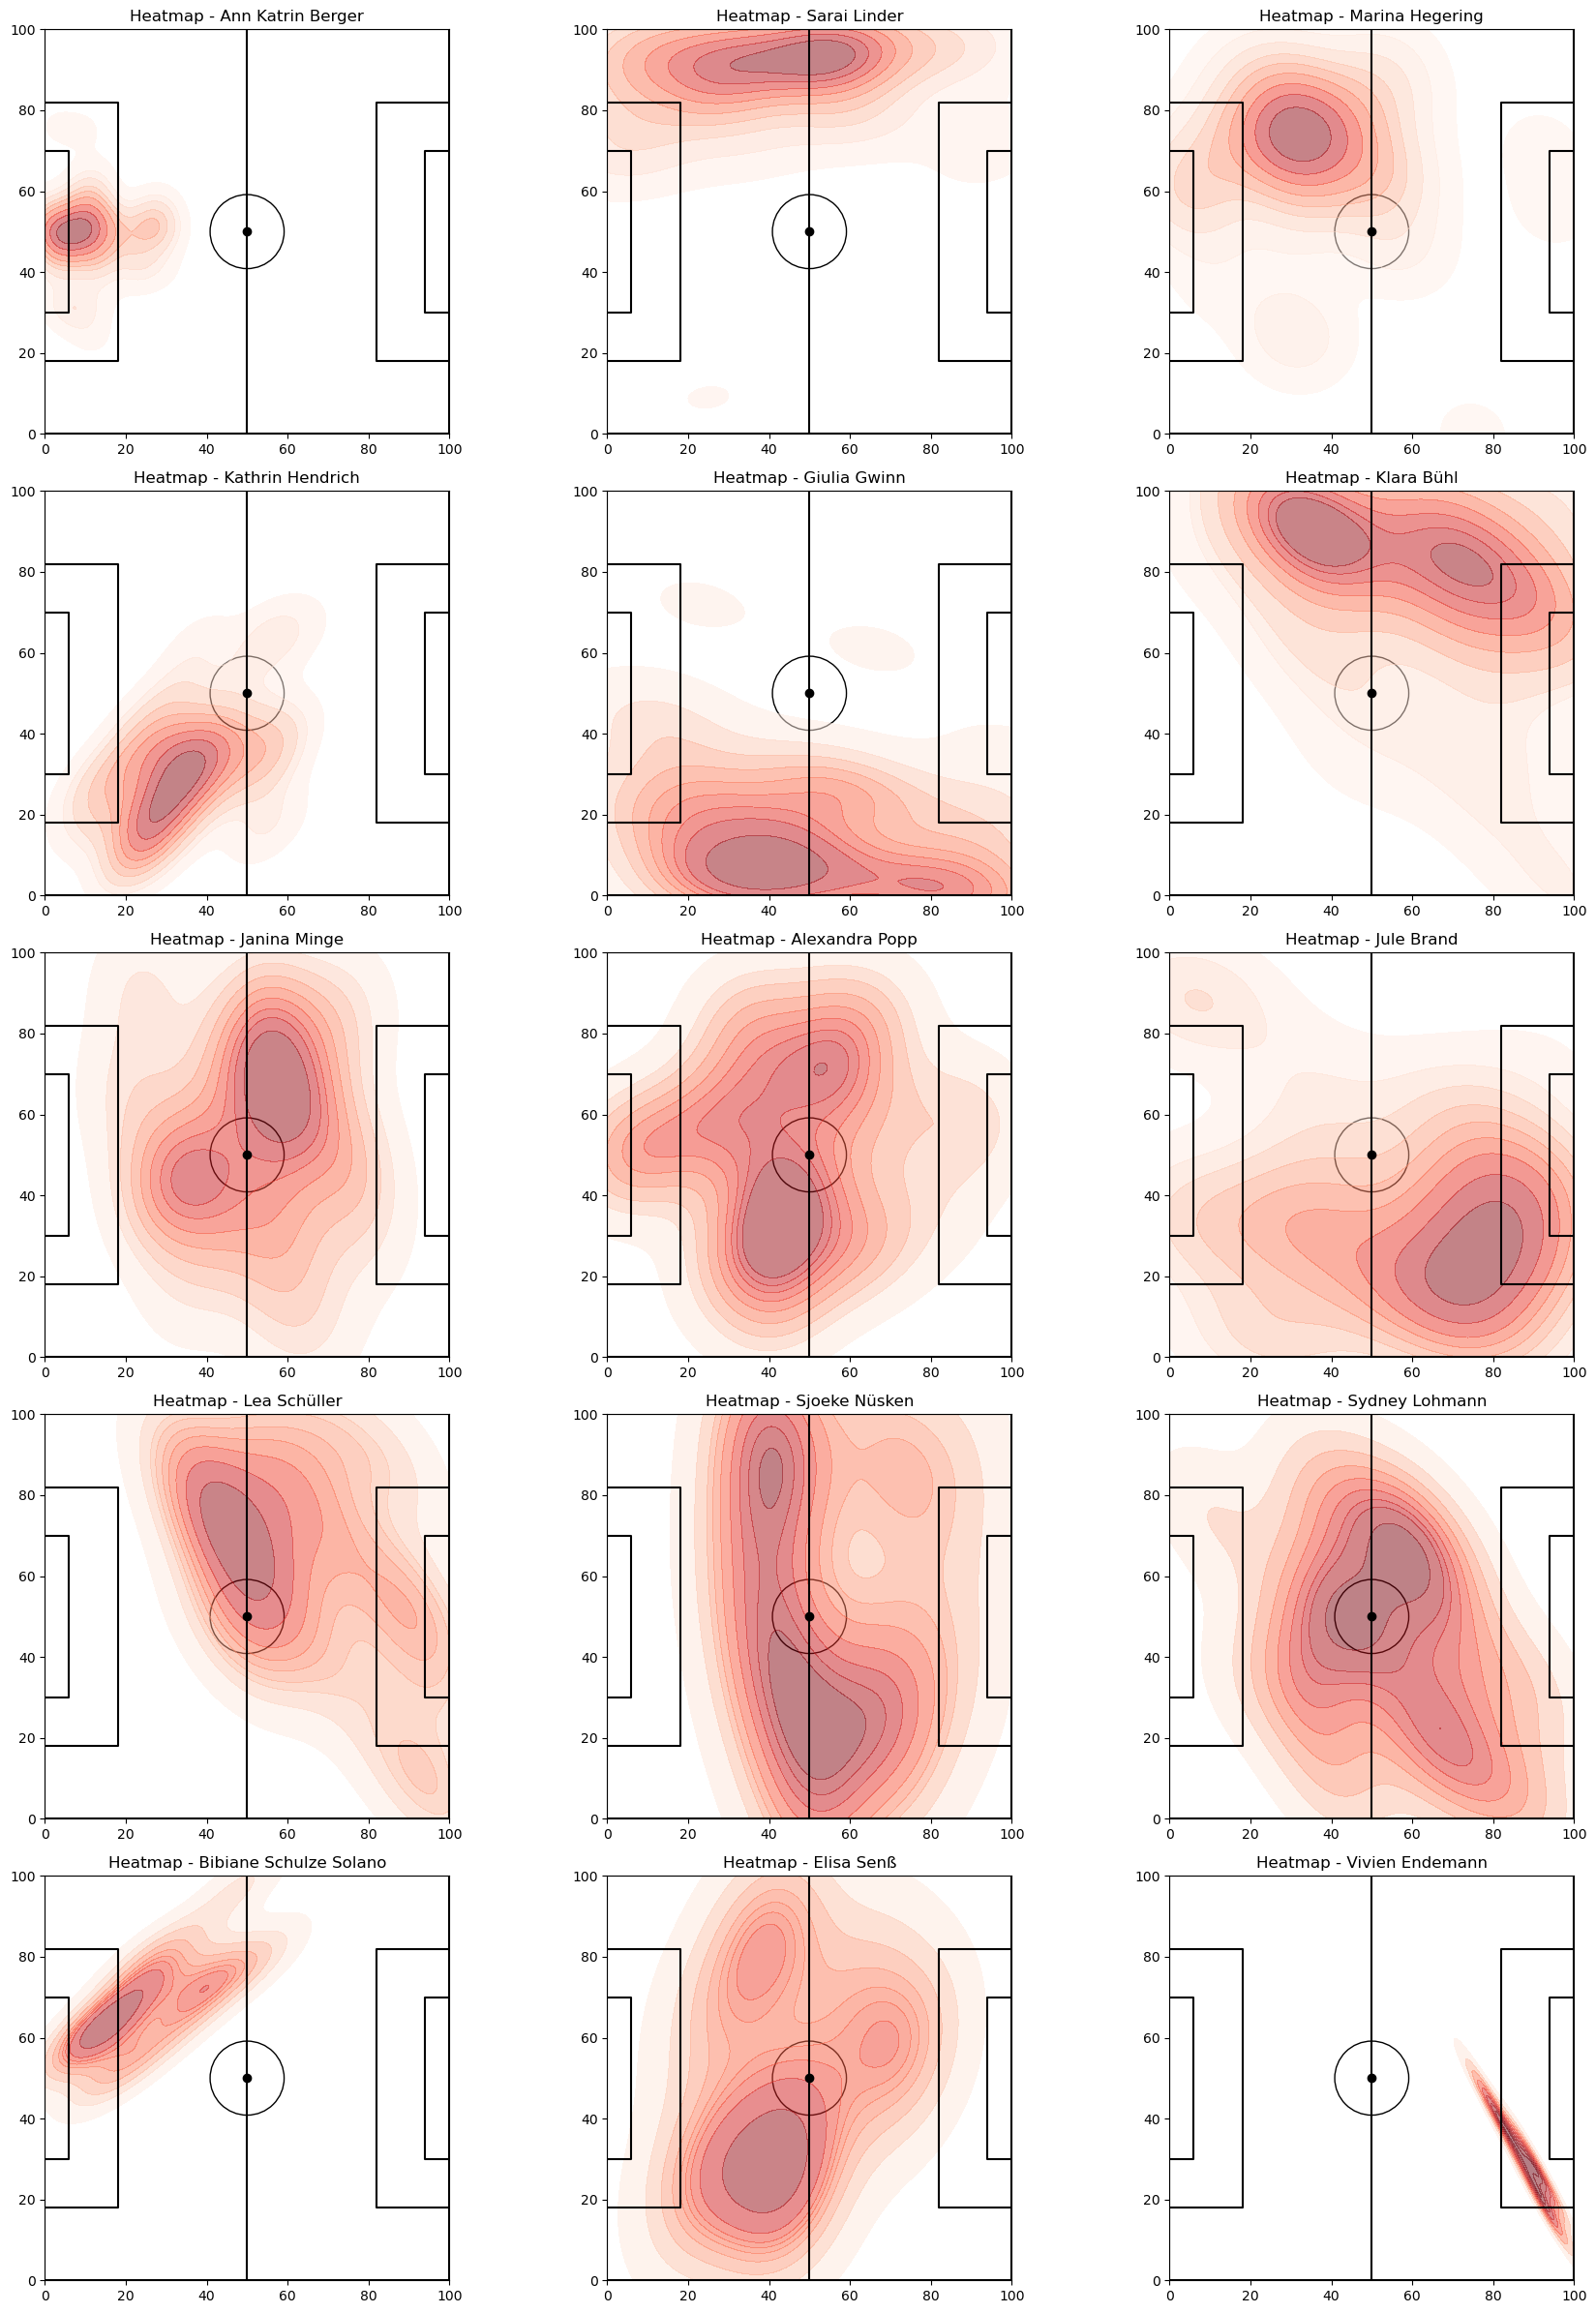

In [8]:
# Create subplots for individual heatmaps
fig, axes = plt.subplots(5, 3, figsize=(18, 24))

# Collect all coordinates for combined heatmap
all_x_coords = []
all_y_coords = []

# Plot each player's heatmap
for ax, (player_name, player_id) in zip(axes.flat, ger_player_ids.items()):
    x_coords, y_coords = fetch_heatmap_data(player_id)
    plot_heatmap(ax, x_coords, y_coords, f"Heatmap - {player_name}")
    all_x_coords.extend(x_coords)
    all_y_coords.extend(y_coords)

plt.tight_layout()
plt.show()

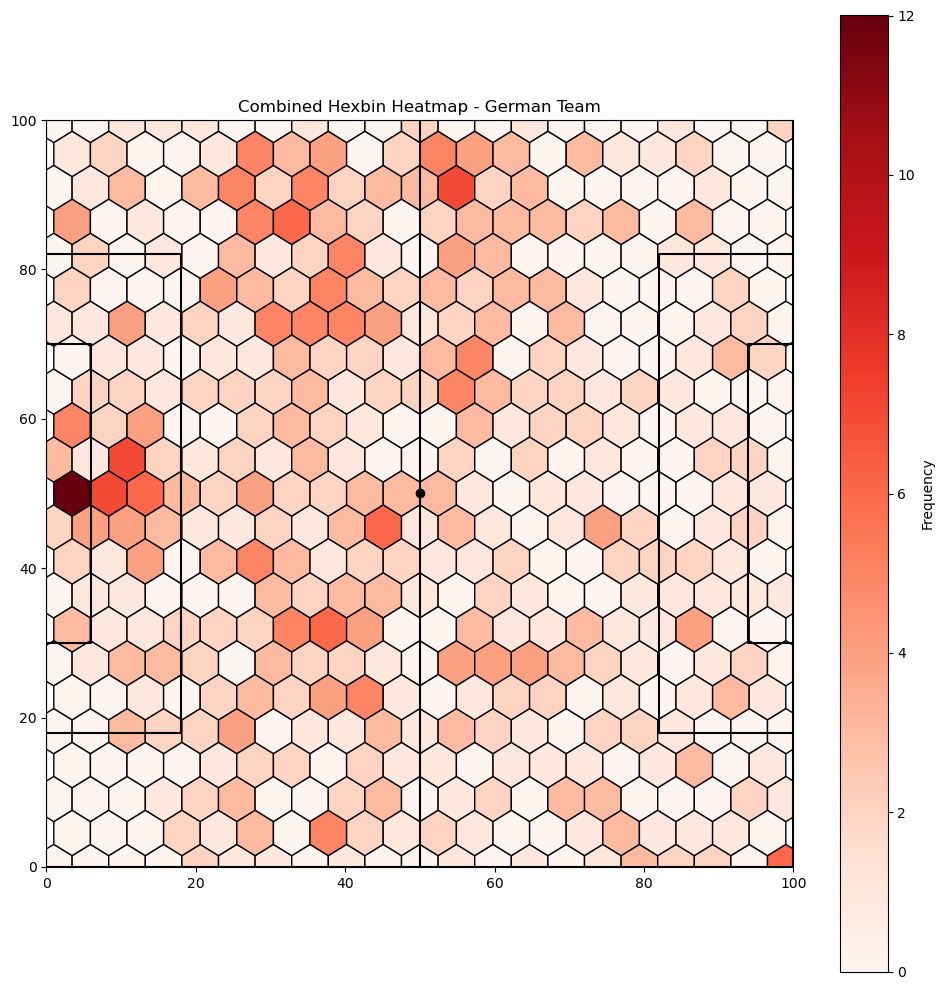

In [9]:
# Create a combined heatmap with hexbin
fig, ax = plt.subplots(figsize=(10, 10))

# Function to plot a combined heatmap with hexbin
def plot_combined_hexbin(ax, x_coords, y_coords):
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black")
    ax.plot([0, 6, 6, 0], [30, 30, 70, 70], color="black")
    ax.plot([100, 94, 94, 100], [30, 30, 70, 70], color="black")
    ax.plot([0, 18, 18, 0], [18, 18, 82, 82], color="black")
    ax.plot([100, 82, 82, 100], [18, 18, 82, 82], color="black")
    ax.plot([50, 50], [0, 100], color="black")
    ax.plot([50], [50], marker='o', color='black')
    circle = plt.Circle((50, 50), 9.15, color="black", fill=False)
    ax.add_patch(circle)
    hb = ax.hexbin(x_coords, y_coords, gridsize=20, cmap='Reds', edgecolors='black')
    cb = plt.colorbar(hb, ax=ax)
    cb.set_label('Frequency')
    ax.set_xlim(0, pitch_length)
    ax.set_ylim(0, pitch_width)
    ax.set_title("Combined Hexbin Heatmap - German Team")
    ax.set_aspect('equal', adjustable='box')

plot_combined_hexbin(ax, all_x_coords, all_y_coords)

plt.tight_layout()
plt.show()

In [10]:
# Function to fetch player statistics
def fetch_player_statistics(player_id):
    url = f'https://api.sofascore.com/api/v1/event/12178908/player/{player_id}/statistics'
    response = requests.get(url)
    data = response.json()
    return data['statistics']

In [11]:
# Combine player IDs
all_player_ids = {**ger_player_ids, **aus_player_ids}

# Fetch and compile statistics for all players
data = []
for player_name, player_id in all_player_ids.items():
    try:
        stats = fetch_player_statistics(player_id)
        stats['Player'] = player_name
        stats['Player_ID'] = player_id
        data.append(stats)
    except KeyError:
        print(f"Statistics not available for player: {player_name}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Reorder columns to place 'Player' and 'Player_ID' first
cols = ['Player', 'Player_ID'] + [col for col in df.columns if col not in ['Player', 'Player_ID']]
df = df[cols]

# Save to Excel
output_path = 'C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_stats_ger_aus_round1.xlsx'
df.to_excel(output_path, index=False)

print(f"Data successfully saved to {output_path}")


Data successfully saved to C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_stats_ger_aus_round1.xlsx


In [12]:
# URL to fetch match statistics
url = 'https://www.sofascore.com/api/v1/event/12178908/statistics'

# Fetch the data
response = requests.get(url)
data = response.json()

# Process the data to map home to Germany and away to Australia
team_data = []

for team in data['statistics']:
    for group in team.get('groups', []):
        group_name = group.get('groupName', 'General')
        for stat in group.get('statisticsItems', []):
            team_data.append({
                'Team': 'Germany',
                'Group': group_name,
                'Category': stat.get('name', 'Unknown'),
                'Value': stat.get('homeValue', 0)
            })
            team_data.append({
                'Team': 'Australia',
                'Group': group_name,
                'Category': stat.get('name', 'Unknown'),
                'Value': stat.get('awayValue', 0)
            })

# Convert the processed data into a DataFrame
df = pd.DataFrame(team_data)

# Pivot the DataFrame for comparison
comparison_df = df.pivot_table(index=['Group', 'Category'], columns='Team', values='Value', aggfunc='first').reset_index()

# Save the comparison DataFrame to Excel
comparison_df.to_excel('C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_stats_ger_aus_round1.xlsx', index=False)

# Print the comparison DataFrame to inspect it
print(comparison_df)

Team           Group                 Category  Australia  Germany
0             Attack       Big chances missed          0        2
1             Attack       Big chances scored          0        3
2             Attack    Fouled in final third          1        1
3             Attack                 Offsides          0        5
4             Attack  Touches in penalty area         22       33
5          Defending               Clearances         24       15
6          Defending            Interceptions          7        6
7          Defending               Recoveries         57       63
8          Defending              Tackles won         12       11
9          Defending            Total tackles         14       19
10             Duels             Aerial duels          7       12
11             Duels             Dispossessed         10        8
12             Duels                 Dribbles          7        8
13             Duels                    Duels         44       56
14        

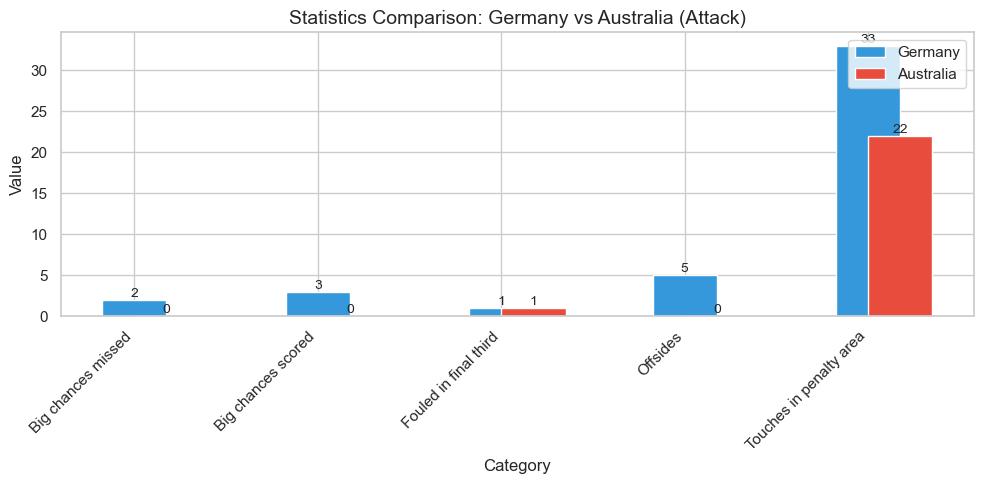

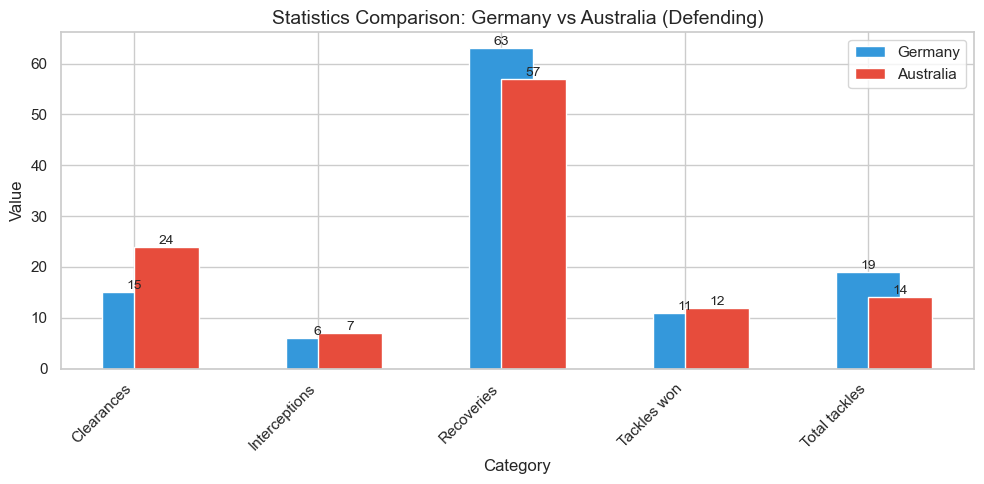

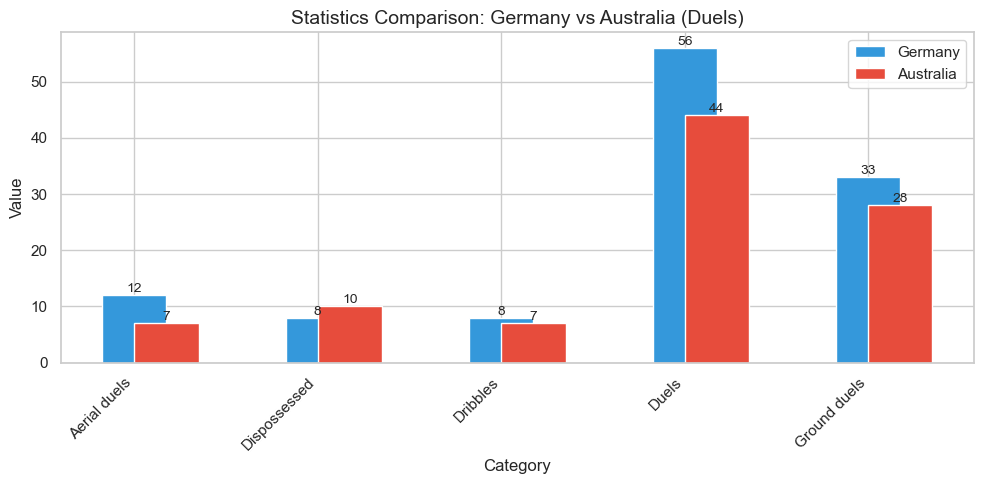

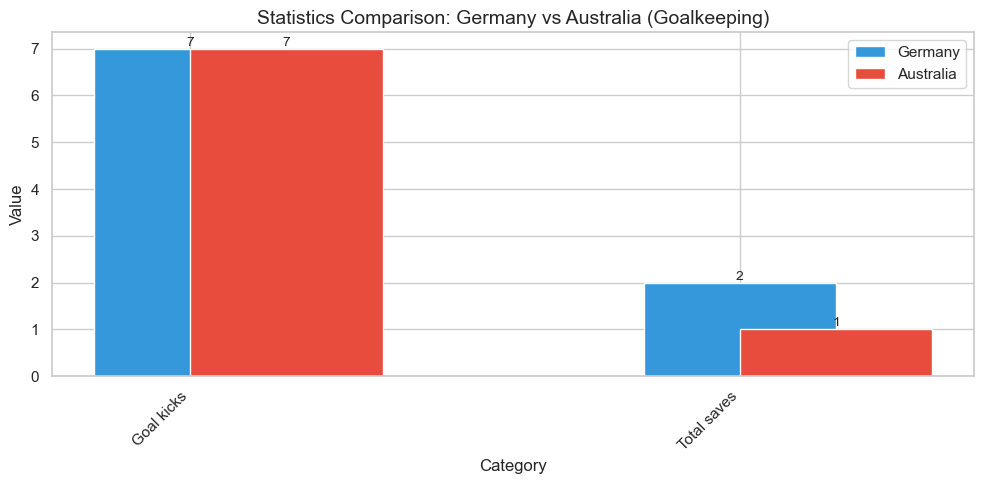

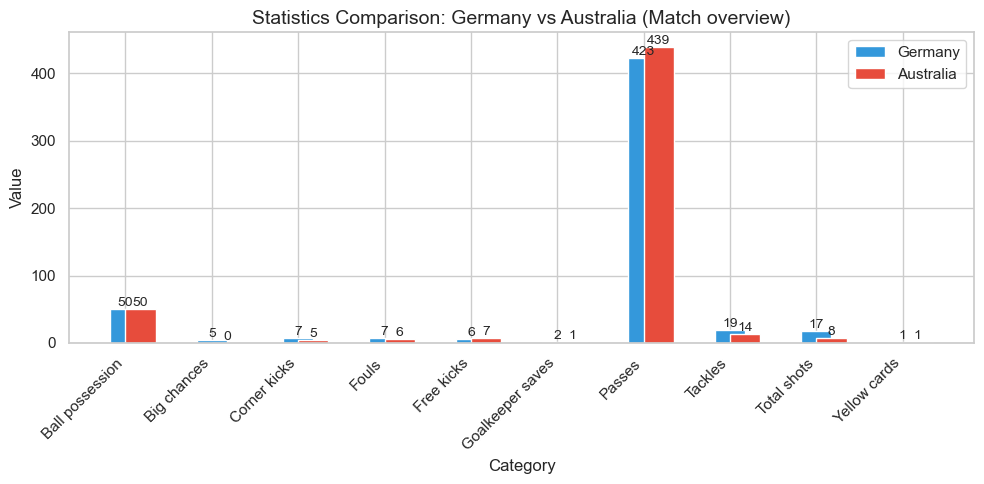

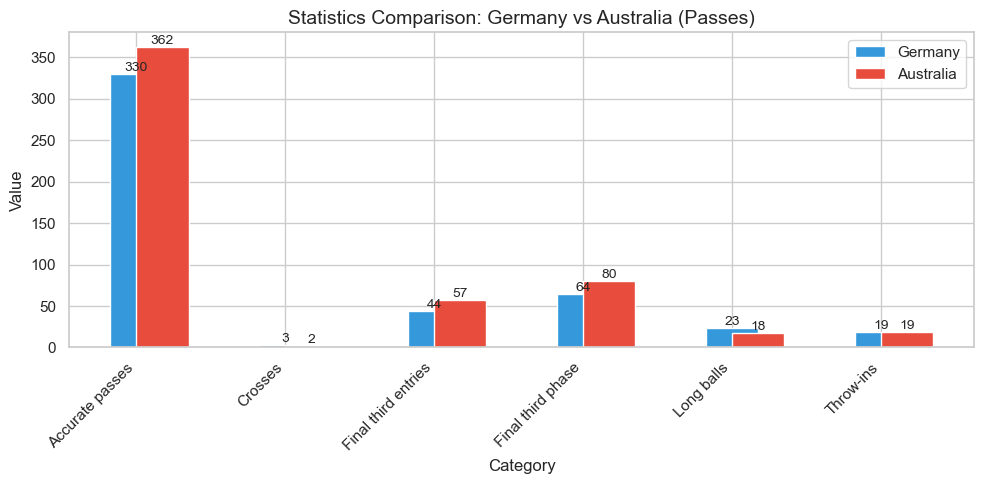

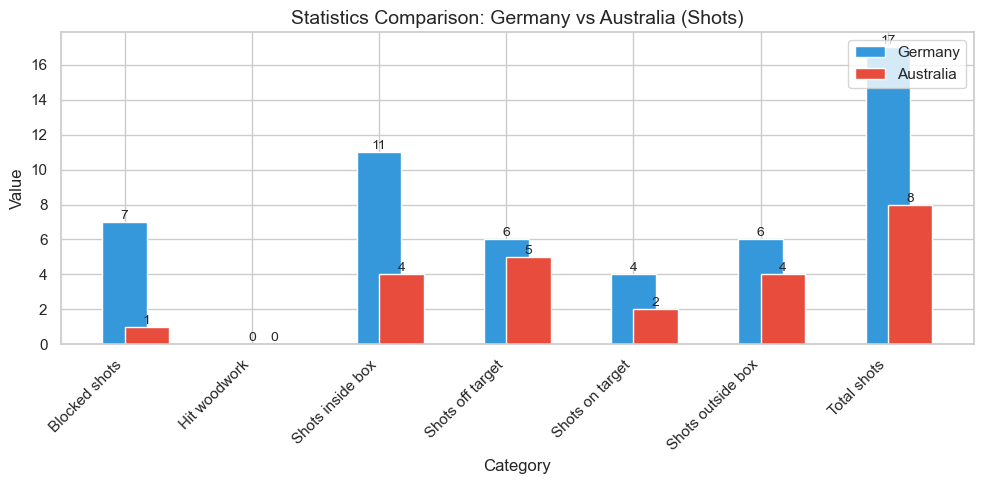

In [13]:
# Set the modern visual style
sns.set(style="whitegrid")

# Define color palette
palette = {"Germany": "#3498db", "Australia": "#e74c3c"}

# Create a compact plot for each group
for group in comparison_df['Group'].unique():
    group_df = comparison_df[comparison_df['Group'] == group]
    plt.figure(figsize=(10, 5))
    bar_width = 0.35
    
    # Plotting the bars
    bar1 = plt.bar(group_df['Category'], group_df['Germany'], bar_width, label='Germany', color=palette['Germany'], align='center')
    bar2 = plt.bar(group_df['Category'], group_df['Australia'], bar_width, label='Australia', color=palette['Australia'], align='edge')
    
    # Adding labels and title
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.title(f'Statistics Comparison: Germany vs Australia ({group})', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper right')
    
    # Adding value labels on top of bars
    for bar in bar1 + bar2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

In [14]:
# Function to fetch player statistics by ID
def fetch_player_statistics(player_id):
    url = f'https://api.sofascore.com/api/v1/event/12178908/player/{player_id}/statistics'
    response = requests.get(url)
    data = response.json()
    return data['statistics'].get('rating', 'N/A')

In [15]:
# Collect player statistics
player_stats = []

# Process statistics for Australian players
for player, player_id in aus_player_ids.items():
    rating = fetch_player_statistics(player_id)
    player_stats.append({
        'Player': player,
        'Team': 'Australia',
        'Rating': rating
    })

# Process statistics for German players
for player, player_id in ger_player_ids.items():
    rating = fetch_player_statistics(player_id)
    player_stats.append({
        'Player': player,
        'Team': 'Germany',
        'Rating': rating
    })


In [16]:
# Convert to DataFrame
df = pd.DataFrame(player_stats)

# Sort the DataFrame by rating
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.sort_values(by='Rating', ascending=False)


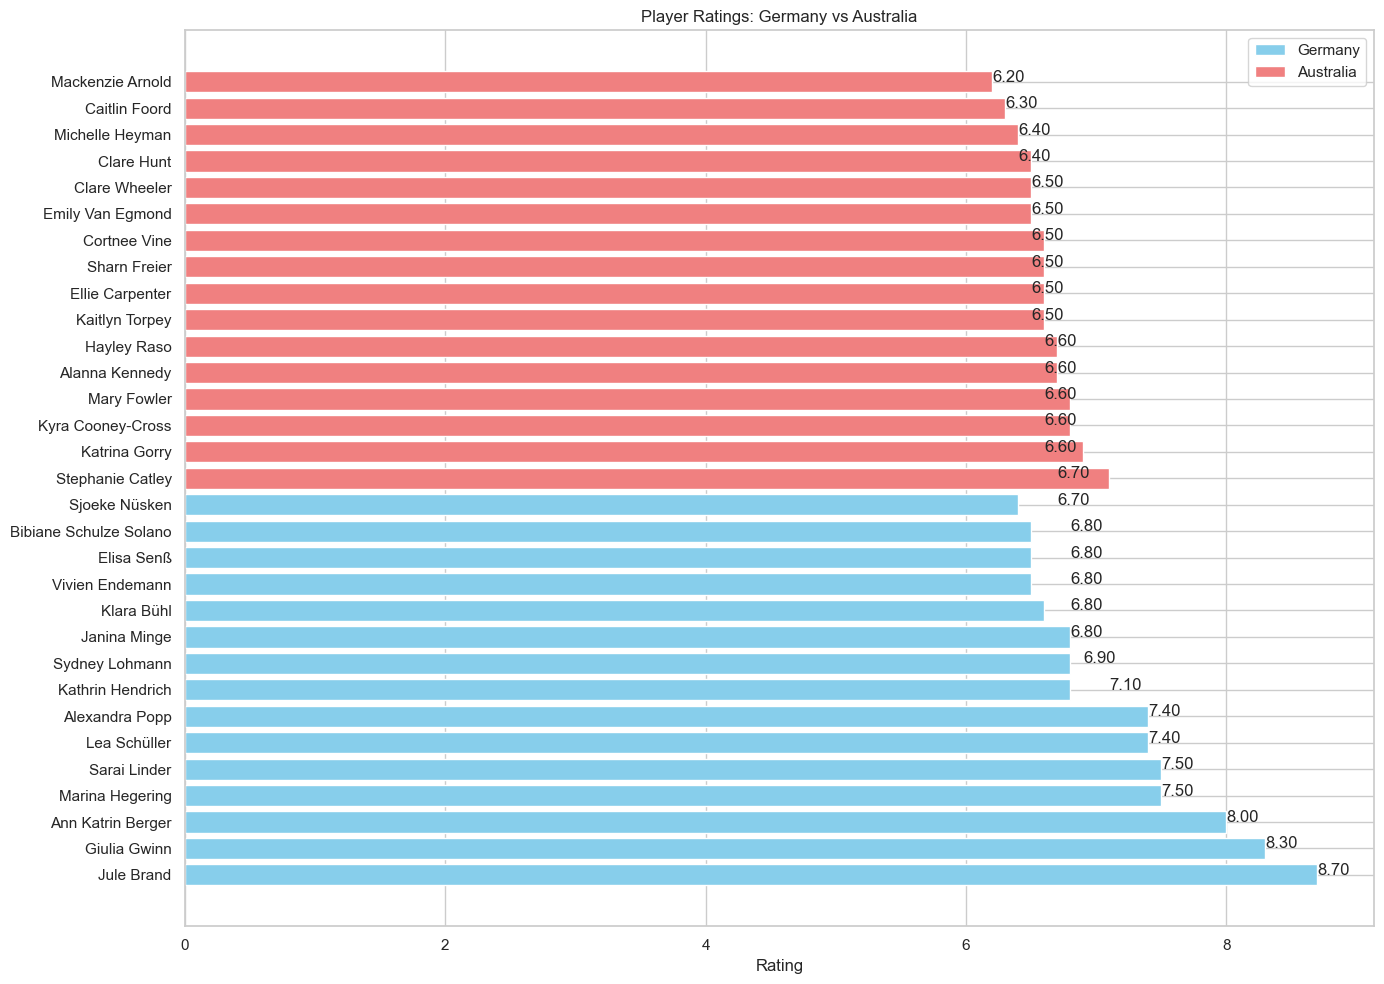

In [17]:
# Plot the data
plt.figure(figsize=(14, 10))

# Plot ratings for German players
german_players = df[df['Team'] == 'Germany']
plt.barh(german_players['Player'], german_players['Rating'], color='skyblue', label='Germany')

# Plot ratings for Australian players
australian_players = df[df['Team'] == 'Australia']
plt.barh(australian_players['Player'], australian_players['Rating'], color='lightcoral', label='Australia')

# Add titles and labels
plt.xlabel('Rating')
plt.title('Player Ratings: Germany vs Australia')
plt.legend()

# Annotate ratings on the bars
for index, value in enumerate(df['Rating']):
    plt.text(value, index, f'{value:.2f}')

# Show the plot
plt.tight_layout()
plt.show()

# Save the DataFrame to an Excel file
df.to_excel('C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_ratings_ger_aus.xlsx', index=False)

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Player Name': ['Alanna Kennedy', 'Klara Bühl', 'Klara Bühl', 'Klara Bühl', 'Clare Hunt', 
                    'Jule Brand', 'Lea Schüller', 'Sydney Lohmann', 'Mary Fowler', 'Lea Schüller',
                    'Jule Brand', 'Jule Brand', 'Mary Fowler', 'Stephanie Catley', 'Alexandra Popp',
                    'Sjoeke Nüsken', 'Caitlin Foord', 'Caitlin Foord', 'Klara Bühl', 'Mary Fowler',
                    'Marina Hegering', 'Klara Bühl', 'Jule Brand', 'Jule Brand', 'Jule Brand'],
    'Team': ['Australia', 'Germany', 'Germany', 'Germany', 'Australia', 
             'Germany', 'Germany', 'Germany', 'Australia', 'Germany',
             'Germany', 'Germany', 'Australia', 'Australia', 'Germany',
             'Germany', 'Australia', 'Australia', 'Germany', 'Australia',
             'Germany', 'Germany', 'Germany', 'Germany', 'Germany'],
    'Shot Type': ['miss', 'block', 'block', 'miss', 'miss', 
                  'goal', 'goal', 'block', 'save', 'block',
                  'miss', 'miss', 'miss', 'save', 'miss',
                  'block', 'miss', 'miss', 'miss', 'block',
                  'goal', 'block', 'block', 'miss', 'save'],
    'Situation': ['corner', 'assisted', 'assisted', 'regular', 'assisted',
                  'assisted', 'corner', 'assisted', 'assisted', 'assisted',
                  'assisted', 'assisted', 'assisted', 'free-kick', 'regular',
                  'assisted', 'fast-break', 'assisted', 'assisted', 'regular',
                  'corner', 'corner', 'corner', 'fast-break', 'assisted'],
    'Body Part': ['head', 'right-foot', 'left-foot', 'right-foot', 'right-foot',
                  'right-foot', 'head', 'right-foot', 'left-foot', 'right-foot',
                  'left-foot', 'right-foot', 'left-foot', 'left-foot', 'left-foot',
                  'left-foot', 'right-foot', 'head', 'right-foot', 'left-foot',
                  'head', 'right-foot', 'head', 'left-foot', 'left-foot'],
    'Goal Mouth Location': ['close-left', 'high-right', 'low-centre', 'right', 'close-right',
                            'low-right', 'low-left', 'low-centre', 'low-centre', 'low-right',
                            'close-high', 'close-right', 'right', 'high-right', 'high',
                            'low-centre', 'close-right', 'left', 'close-high', 'low-centre',
                            'low-centre', 'low-centre', 'low-centre', 'close-high', 'low-centre'],
    'X Coordinate': [6.4, 8.9, 22.6, 14.2, 19.4, 
                     3.6, 7.6, 22.1, 26.7, 12.2,
                     22.0, 26.3, 15.0, 22.1, 30.5,
                     13.1, 14.3, 10.5, 18.9, 10.9,
                     4.2, 10.2, 8.0, 10.8, 12.9],
    'Y Coordinate': [40.7, 31.5, 37.4, 33.3, 58.9,
                     52.2, 48.5, 60.4, 42.2, 46.4,
                     67.9, 54.8, 28.9, 73.6, 48.7,
                     56.9, 84.8, 36.0, 55.4, 47.5,
                     44.7, 68.5, 53.5, 56.2, 67.6],
    'Goal (1) / Miss (0)': [0, 0, 0, 0, 0,
                             1, 1, 0, 0, 0,
                             0, 0, 0, 0, 0,
                             0, 0, 0, 0, 0,
                             1, 0, 0, 0, 0]
}

df = pd.DataFrame(data)




In [19]:

# Assign colors for teams
team_colors = {
    'Australia': 'yellow',
    'Germany': 'black'
}

# Assign markers for body parts
body_part_markers = {
    'head': 'o',          # Circle
    'right-foot': '^',    # Triangle up
    'left-foot': 's'      # Square
}


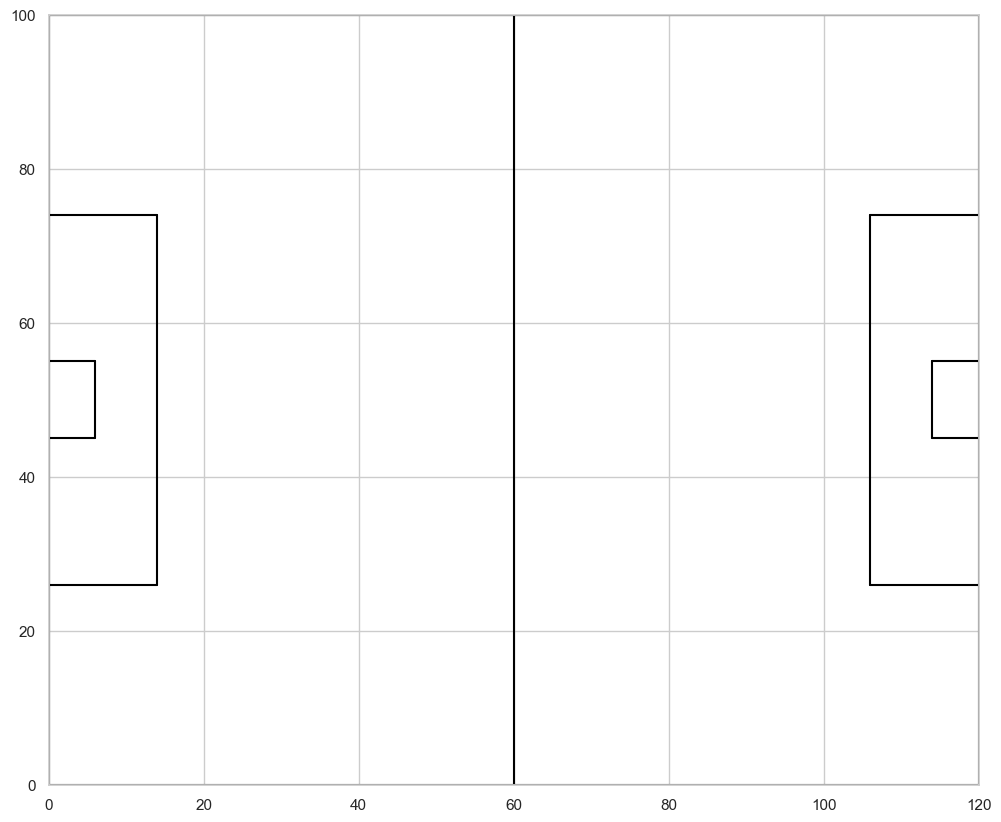

In [20]:
# Plotting the shot map
fig, ax = plt.subplots(figsize=(12, 10))

# Setting up the dimensions of the field
field_dimen = (100, 120)
ax.set_xlim(0, field_dimen[1])
ax.set_ylim(0, field_dimen[0])

# Drawing the field
# Pitch Outline & Centre Line
plt.plot([0, 0], [0, 100], color="black")
plt.plot([0, 120], [100, 100], color="black")
plt.plot([120, 120], [100, 0], color="black")
plt.plot([120, 0], [0, 0], color="black")
plt.plot([60, 60], [0, 100], color="black")

# Left Penalty Area
plt.plot([14, 14], [74, 26], color="black")
plt.plot([0, 14], [74, 74], color="black")
plt.plot([0, 14], [26, 26], color="black")

# Right Penalty Area
plt.plot([120, 106], [74, 74], color="black")
plt.plot([106, 106], [74, 26], color="black")
plt.plot([120, 106], [26, 26], color="black")

# Left 6-yard Box
plt.plot([0, 6], [55, 55], color="black")
plt.plot([6, 6], [55, 45], color="black")
plt.plot([6, 0], [45, 45], color="black")

# Right 6-yard Box
plt.plot([120, 114], [55, 55], color="black")
plt.plot([114, 114], [55, 45], color="black")
plt.plot([114, 120], [45, 45], color="black")


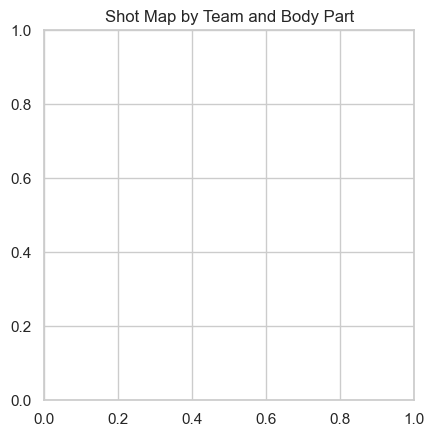

In [21]:
# Plot the shots
for team in df['Team'].unique():
    team_data = df[df['Team'] == team]
    for body_part, marker in body_part_markers.items():
        body_part_data = team_data[team_data['Body Part'] == body_part]
        goals = body_part_data[body_part_data['Goal (1) / Miss (0)'] == 1]
        misses = body_part_data[body_part_data['Goal (1) / Miss (0)'] == 0]
        
        ax.scatter(goals['X Coordinate'], goals['Y Coordinate'], color=team_colors[team], marker=marker, label=f'{team} Goal ({body_part})', s=100)
        ax.scatter(misses['X Coordinate'], misses['Y Coordinate'], color=team_colors[team], marker=marker, label=f'{team} Miss ({body_part})', s=100, alpha=0.6, edgecolor='black')

# Adding legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# Title
plt.title('Shot Map by Team and Body Part')

# Display
plt.gca().set_aspect('equal', adjustable='box')
plt.show()